In [1]:
from pandas import read_csv, DataFrame, Series
from pandas.plotting import scatter_matrix
from numpy import set_printoptions, argmax, isnan, nan, mean, random
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.feature_selection import RFE
import tensorflow as tf
import numpy as np
import pandas as pd
print(tf.__version__)
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

2025-05-01 17:07:30.984465: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2025-05-01 17:07:30.991078: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1746144450.998392  116530 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1746144451.000547  116530 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1746144451.006335  116530 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking 

2.19.0
Num GPUs Available:  1


In [2]:
# Set random seeds for reproducibility
tf.keras.backend.clear_session()
random.seed(42)
tf.random.set_seed(42)

from perform_kickstarer_eda import X_train, X_test, y_train, y_test

# Define the model architecture
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
hidden = tf.keras.layers.Dense(32, activation="relu", kernel_initializer='he_normal')(input_layer)
# Change output layer to sigmoid for binary classification
output = tf.keras.layers.Dense(1, activation="sigmoid")(hidden)

model = tf.keras.models.Model(inputs=[input_layer], outputs=[output])
# Change to binary_crossentropy loss and classification metrics
model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy", tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)
model.summary()

ks_data shape: (20632, 68)
Categorical columns: ['country', 'currency', 'deadline', 'state_changed_at', 'created_at', 'launched_at', 'category', 'deadline_weekday', 'state_changed_at_weekday', 'created_at_weekday', 'launched_at_weekday', 'launch_to_deadline', 'launch_to_state_change']
Converted boolean column: staff_pick
Dropped 'state_changed_at_weekday' column
Dropping original column: category
Encoded column: category → 25 features
Dropping original column: deadline_weekday
Encoded column: deadline_weekday → 7 features
Dropping original column: created_at_weekday
Encoded column: created_at_weekday → 7 features
Dropping original column: launched_at_weekday
Encoded column: launched_at_weekday → 7 features
Total categorical columns after encoding: 54


I0000 00:00:1746144456.024405  116530 gpu_device.cc:2019] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 9558 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 4070, pci bus id: 0000:01:00.0, compute capability: 8.9


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

In [3]:
# Train the classifier
history = model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Epoch 1/50


/home/tr/code/cmpe188-assignments/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 66))
  warnings.warn(msg)
I0000 00:00:1746144462.556947  116669 service.cc:152] XLA service 0x7f7b50016d80 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
I0000 00:00:1746144462.556978  116669 service.cc:160]   StreamExecutor device (0): NVIDIA GeForce RTX 4070, Compute Capability 8.9
2025-05-01 17:07:42.574749: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1746144462.641124  116669 cuda_dnn.cc:529] Loaded cuDNN version 90300


 72/516 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.3242 - auc: 0.6439 - loss: 1.9901 - precision: 0.2965 - recall: 0.9792

I0000 00:00:1746144462.908343  116669 device_compiler.h:188] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


516/516 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6647 - auc: 0.7641 - loss: 0.8429 - precision: 0.5024 - recall: 0.7120

/home/tr/code/cmpe188-assignments/.venv/lib/python3.12/site-packages/keras/src/models/functional.py:238: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: ['keras_tensor']
Received: inputs=Tensor(shape=(None, 66))
  warnings.warn(msg)


516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.6650 - auc: 0.7643 - loss: 0.8421 - precision: 0.5027 - recall: 0.7120 - val_accuracy: 0.9101 - val_auc: 0.9657 - val_loss: 0.2300 - val_precision: 0.8575 - val_recall: 0.8358
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9163 - auc: 0.9696 - loss: 0.2123 - precision: 0.8598 - recall: 0.8508 - val_accuracy: 0.9159 - val_auc: 0.9705 - val_loss: 0.2042 - val_precision: 0.8627 - val_recall: 0.8521
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9222 - auc: 0.9736 - loss: 0.1919 - precision: 0.8683 - recall: 0.8632 - val_accuracy: 0.9147 - val_auc: 0.9721 - val_loss: 0.1969 - val_precision: 0.8591 - val_recall: 0.8521
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9226 - auc: 0.9751 - loss: 0.1850 - precision: 0.8683 - recall: 0.8646 - val_accuracy: 0.9174 - val_auc: 0.9731 - val_loss: 0.1929 - val_precision: 0.8616 - val_recall: 0.8595
Epoch 5/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 

In [ ]:
# Hyperparameter tuning code for binary classifier
# configs = [
#     {"layers": [32], "activation": "relu"},
#     {"layers": [64], "activation": "relu"},
#     {"layers": [32], "activation": "tanh"},
#     {"layers": [64], "activation": "tanh"},
#     {"layers": [32], "activation": "selu"},
#     {"layers": [32], "activation": "sigmoid"},
# ]

# configs = [
#     {"layers": [16], "activation": "relu"},
#     {"layers": [32], "activation": "relu"},
#     {"layers": [64], "activation": "relu"},
#     {"layers": [128], "activation": "relu"},
#     {"layers": [256], "activation": "relu"},
#     {"layers": [32, 16], "activation": "relu"},
#     {"layers": [64, 32], "activation": "relu"},
#     {"layers": [128, 64], "activation": "relu"},
#     {"layers": [64, 32, 16], "activation": "relu"},
# ]

# Added tuning for optimizers and learning rates NOTE: Not sure if we should tune # of epochs as well (50,100,200)
configs = [
    {"layers": [16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [128], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [128], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [256], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [256], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [64, 32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [64, 32], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [128, 64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [128, 64], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.001},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "adam", "learning_rate": 0.01},

    {"layers": [16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [128], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [128], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [256], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [256], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [64, 32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [64, 32], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [128, 64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [128, 64], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.001},
    {"layers": [64, 32, 16], "activation": "relu", "optimizer": "sgd", "learning_rate": 0.01}
]

results = []
for config in configs:
    print(f"Trying config: {config}")
    tf.keras.backend.clear_session()

    if config["optimizer"] == "adam":
        optimizer = tf.keras.optimizers.Adam(config["learning_rate"])
    elif config["optimizer"] == "sgd":
        optimizer = tf.keras.optimizers.SGD(learning_rate=config["learning_rate"])

    # Build model with current configuration
    input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
    x = input_layer
    for units in config["layers"]:
        x = tf.keras.layers.Dense(units, activation=config["activation"])(x)

    # Binary classification output
    output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

    model = tf.keras.models.Model(inputs=input_layer, outputs=output)
    model.compile(
        loss="binary_crossentropy",
        optimizer=optimizer,
        metrics=["accuracy", tf.keras.metrics.AUC()]
    )
    model.summary()

    # Train model
    history = model.fit(
        X_train, y_train,
        epochs=50,
        validation_data=(X_test, y_test),
        verbose=0
    )

    # Get best results based on validation accuracy
    val_acc_hist = history.history["val_accuracy"]
    best_val_acc = np.max(val_acc_hist)
    best_epoch = np.argmax(val_acc_hist)

    best_loss = history.history["loss"][best_epoch]
    best_acc = history.history["accuracy"][best_epoch]
    best_val_loss = history.history["val_loss"][best_epoch]
    best_auc = history.history["auc"][best_epoch]
    best_val_auc = history.history["val_auc"][best_epoch]

    print(f"Best epoch: {best_epoch+1} | loss: {best_loss:.4f} - acc: {best_acc:.4f} - auc: {best_auc:.4f} - val_loss: {best_val_loss:.4f} - val_acc: {best_val_acc:.4f} - val_auc: {best_val_auc:.4f}")

    # Store results
    results.append({
        "config": config,
        "epoch": best_epoch+1,
        "loss": best_loss,
        "accuracy": best_acc,
        "auc": best_auc,
        "val_loss": best_val_loss,
        "val_accuracy": best_val_acc,
        "val_auc": best_val_auc,
        "history": history.history
    })

# Display results table
df_results = pd.DataFrame(results)
display(df_results)

Trying config: {'layers': [16], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 16)             │         1,072 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,089 (4.25 KB)

 Trainable params: 1,089 (4.25 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 46 | loss: 0.1454 - acc: 0.9401 - auc: 0.9841 - val_loss: 0.1761 - val_acc: 0.9280 - val_auc: 0.9776
Trying config: {'layers': [32], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,177 (8.50 KB)

 Trainable params: 2,177 (8.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 27 | loss: 0.1474 - acc: 0.9397 - auc: 0.9838 - val_loss: 0.1746 - val_acc: 0.9287 - val_auc: 0.9773
Trying config: {'layers': [64], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,353 (17.00 KB)

 Trainable params: 4,353 (17.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 18 | loss: 0.1385 - acc: 0.9433 - auc: 0.9858 - val_loss: 0.1742 - val_acc: 0.9290 - val_auc: 0.9779
Trying config: {'layers': [128], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,705 (34.00 KB)

 Trainable params: 8,705 (34.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 19 | loss: 0.1177 - acc: 0.9533 - auc: 0.9896 - val_loss: 0.1865 - val_acc: 0.9280 - val_auc: 0.9764
Trying config: {'layers': [256], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │        17,152 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │           257 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 17,409 (68.00 KB)

 Trainable params: 17,409 (68.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 8 | loss: 0.1475 - acc: 0.9393 - auc: 0.9839 - val_loss: 0.1834 - val_acc: 0.9254 - val_auc: 0.9764
Trying config: {'layers': [32, 16], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 32)             │         2,144 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,689 (10.50 KB)

 Trainable params: 2,689 (10.50 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 22 | loss: 0.1408 - acc: 0.9427 - auc: 0.9850 - val_loss: 0.1770 - val_acc: 0.9302 - val_auc: 0.9774
Trying config: {'layers': [64, 32], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,401 (25.00 KB)

 Trainable params: 6,401 (25.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 10 | loss: 0.1380 - acc: 0.9433 - auc: 0.9858 - val_loss: 0.1879 - val_acc: 0.9256 - val_auc: 0.9762
Trying config: {'layers': [128, 64], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │         8,576 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 16,897 (66.00 KB)

 Trainable params: 16,897 (66.00 KB)

 Non-trainable params: 0 (0.00 B)

2025-05-01 17:18:10.866854: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 12 bytes spill stores, 12 bytes spill loads

2025-05-01 17:18:11.023695: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 4 bytes spill stores, 4 bytes spill loads

2025-05-01 17:18:12.853313: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 4 bytes spill stores, 4 bytes spill loads

2025-05-01 17:18:12.853392: I external/local_xla/xla/stream_executor/cuda/subprocess_compilation.cc:346] ptxas warning : Registers are spilled to local memory in function 'gemm_fusion_dot_147', 12 bytes spill stores, 12 bytes spill loads

2025-05-01 17:18:14.391938: I external/local_xla

Best epoch: 9 | loss: 0.1304 - acc: 0.9473 - auc: 0.9871 - val_loss: 0.2082 - val_acc: 0.9203 - val_auc: 0.9715
Trying config: {'layers': [64, 32, 16], 'activation': 'relu'}


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 66)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │         4,288 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 16)             │           528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            17 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 6,913 (27.00 KB)

 Trainable params: 6,913 (27.00 KB)

 Non-trainable params: 0 (0.00 B)

Best epoch: 11 | loss: 0.1416 - acc: 0.9419 - auc: 0.9848 - val_loss: 0.2016 - val_acc: 0.9229 - val_auc: 0.9731


,config,epoch,loss,accuracy,auc,val_loss,val_accuracy,val_auc,history
0,"{'layers': [16], 'activation': 'relu'}",46,0.145436,0.940064,0.984093,0.176069,0.928017,0.977577,"{'accuracy': [0.8428580164909363, 0.9161868691..."
1,"{'layers': [32], 'activation': 'relu'}",27,0.147351,0.939701,0.983848,0.174610,0.928745,0.977277,"{'accuracy': [0.7922550439834595, 0.9145506620..."
2,"{'layers': [64], 'activation': 'relu'}",18,0.138531,0.943337,0.985797,0.174153,0.928987,0.977893,"{'accuracy': [0.8638870120048523, 0.9202472567..."
3,"{'layers': [128], 'activation': 'relu'}",19,0.117655,0.953276,0.989614,0.186547,0.928017,0.976373,"{'accuracy': [0.8963699340820312, 0.9237622022..."
4,"{'layers': [256], 'activation': 'relu'}",8,0.147501,0.939337,0.983865,0.183371,0.925351,0.976377,"{'accuracy': [0.8998242616653442, 0.9234591722..."
5,"{'layers': [32, 16], 'activation': 'relu'}",22,0.140808,0.942731,0.985016,0.176974,0.930199,0.977371,"{'accuracy': [0.8687352538108826, 0.9230955839..."
6,"{'layers': [64, 32], 'activation': 'relu'}",10,0.137971,0.943276,0.985770,0.187889,0.925594,0.976205,"{'accuracy': [0.9006120562553406, 0.9249742627..."
7,"{'layers': [128, 64], 'activation': 'relu'}",9,0.130401,0.947276,0.987146,0.208204,0.920262,0.971474,"{'accuracy': [0.9007332921028137, 0.9245500564..."
8,"{'layers': [64, 32, 16], 'activation': 'relu'}",11,0.141634,0.941882,0.984845,0.201643,0.922928,0.973143,"{'accuracy': [0.8980062007904053, 0.9244894385..."


In [5]:
# Select the best model configuration based on validation accuracy
best_idx = df_results["val_accuracy"].idxmax()
best_config = df_results.loc[best_idx, "config"]
print(f"Best configuration: {best_config}")

# Build final model with best configuration
tf.keras.backend.clear_session()
input_layer = tf.keras.layers.Input(shape=(X_train.shape[1],))
x = input_layer
for units in best_config["layers"]:
    x = tf.keras.layers.Dense(units, activation=best_config["activation"])(x)
output = tf.keras.layers.Dense(1, activation="sigmoid")(x)

final_model = tf.keras.models.Model(inputs=input_layer, outputs=output)
final_model.compile(
    loss="binary_crossentropy",
    optimizer="adam",
    metrics=["accuracy", tf.keras.metrics.AUC(), tf.keras.metrics.Precision(), tf.keras.metrics.Recall()]
)

# Train the final model
final_history = final_model.fit(
    X_train, y_train,
    epochs=50,
    validation_data=(X_test, y_test),
    verbose=1
)

Best configuration: {'layers': [32, 16], 'activation': 'relu'}
Epoch 1/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.7360 - auc: 0.7913 - loss: 0.4953 - precision: 0.5907 - recall: 0.5532 - val_accuracy: 0.9132 - val_auc: 0.9711 - val_loss: 0.2056 - val_precision: 0.8859 - val_recall: 0.8121
Epoch 2/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9213 - auc: 0.9736 - loss: 0.1896 - precision: 0.8668 - recall: 0.8614 - val_accuracy: 0.9166 - val_auc: 0.9734 - val_loss: 0.1952 - val_precision: 0.8819 - val_recall: 0.8301
Epoch 3/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - auc: 0.9757 - loss: 0.1811 - precision: 0.8718 - recall: 0.8752 - val_accuracy: 0.9190 - val_auc: 0.9743 - val_loss: 0.1905 - val_precision: 0.8803 - val_recall: 0.8415
Epoch 4/50
516/516 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9264 - auc: 0.9770 - loss: 0.1767 - precision: 0.8706 - recall: 0.8768 - val_accuracy: 0.9220 - val_auc: 0.9751 - val_loss: 0.1867 - val_precisio

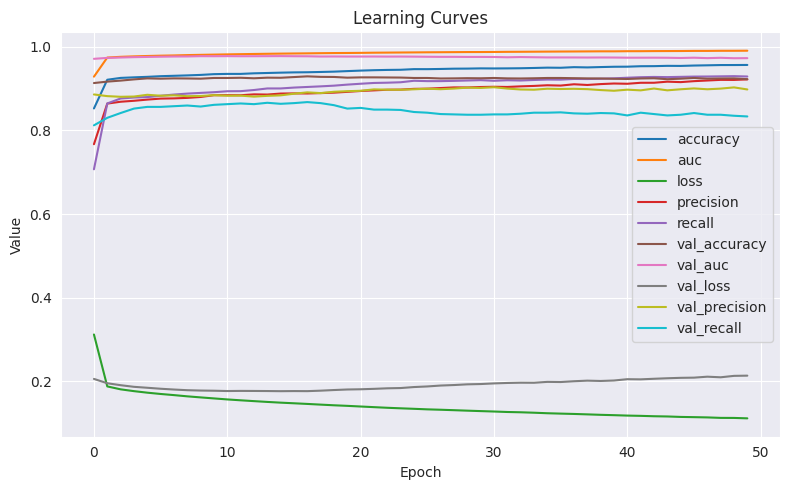

In [6]:
# Plot learning curves for final model
DataFrame(final_history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.title("Learning Curves")
plt.xlabel("Epoch")
plt.ylabel("Value")
plt.legend()
plt.tight_layout()
plt.show()

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9222 - auc: 0.9733 - loss: 0.2129 - precision: 0.8960 - recall: 0.8320
129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step
Test Accuracy: 0.9224
Test AUC: 0.9728
Test Precision: 0.8979
Test Recall: 0.8333

Classification Report:
              precision    recall  f1-score   support

           0       0.93      0.96      0.95      2902
           1       0.90      0.83      0.86      1224

    accuracy                           0.92      4126
   macro avg       0.91      0.90      0.91      4126
weighted avg       0.92      0.92      0.92      4126


Confusion Matrix:
[[2786  116]
 [ 204 1020]]


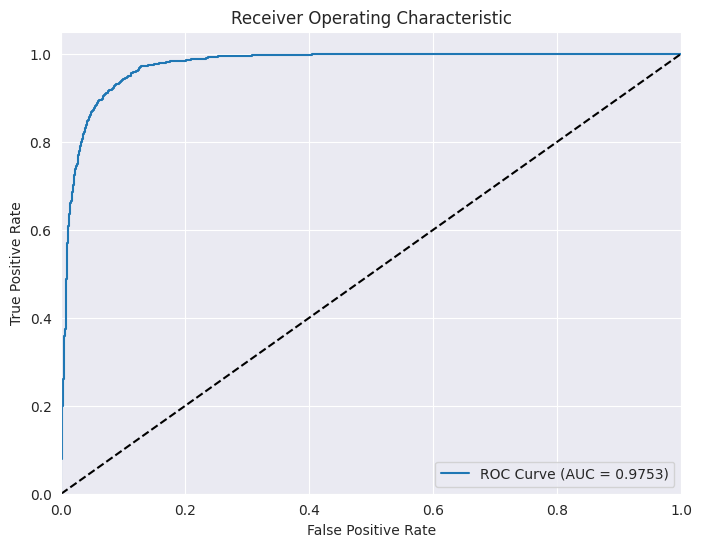

In [7]:
# Evaluate the final model
test_loss, test_acc, test_auc, test_precision, test_recall = final_model.evaluate(X_test, y_test)

# Get predictions
y_pred_prob = final_model.predict(X_test).flatten()
y_pred = (y_pred_prob > 0.5).astype(int)

from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Print metrics
print(f"Test Accuracy: {test_acc:.4f}")
print(f"Test AUC: {test_auc:.4f}")
print(f"Test Precision: {test_precision:.4f}")
print(f"Test Recall: {test_recall:.4f}")

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Plot ROC curve
fpr, tpr, _ = roc_curve(y_test, y_pred_prob)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()